In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Христина/data.csv', delimiter=';')

**Students who enroll at an older age are more likely to drop out compared to younger students.**

In [ ]:
df_relevant = df[['Age at enrollment',
                  'Target']]

df_relevant.head()

,Age at enrollment,Target
0,20,Dropout
1,19,Graduate
2,19,Dropout
3,20,Graduate
4,45,Graduate


In [ ]:
df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


print(df_relevant['Age Group'].value_counts())


Age Group
18-20    2546
21-25     828
31-40     437
26-30     383
41-50     182
51-60      40
Name: count, dtype: int64


<ipython-input-4-097134a82db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


In [ ]:
df_relevant = df_relevant.drop(df_relevant[df_relevant['Target'] == 'Enrolled'].index)

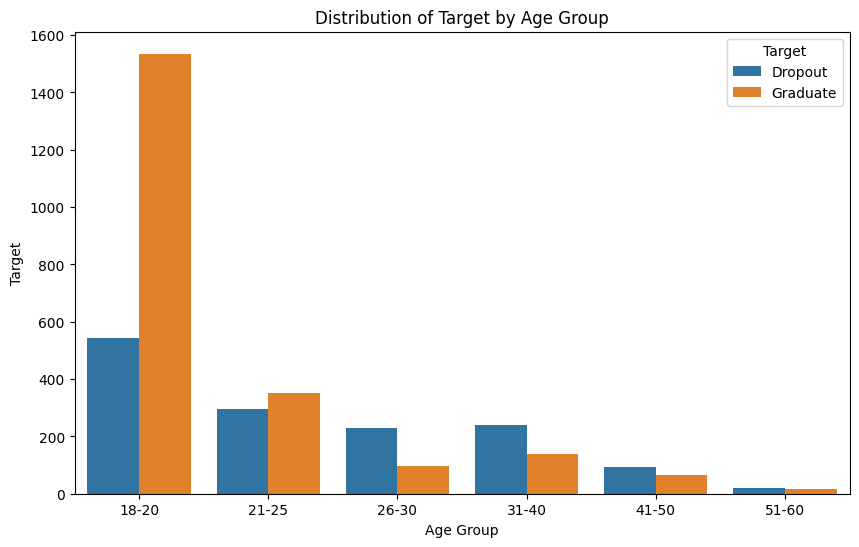

In [ ]:
#Napraviv bar chart za da vidam kako se raspredeluvaat kategoriite na kolonata Target zavisno grupite spored vozrasta
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_relevant, x='Age Group', hue='Target')
plt.title('Distribution of Target by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Target')
plt.show()

In [ ]:
# So pomos na chi-square test mozeme da ja vidime zavisnosta pomegu vozrasta i ishodot t.e. Target kolonata
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df_relevant['Age Group'], df_relevant['Target'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')


if p < 0.05:
    print("Хипотезата се одбива - има статистички значајна разлика.")
else:
    print("Хипотезата не се одбива - нема статистички значајна разлика.")


Chi-Square Value: 414.44706347179925
p-Value: 2.2810032797216965e-87
Degrees of Freedom: 5
Хипотезата се одбива - има статистички значајна разлика.


**Students who enroll at an older age demonstrate lower academic success.**



In [ ]:
df_relevant = df[['Age at enrollment',
                  'Curricular units 1st sem (grade)',
                  'Curricular units 2nd sem (grade)',
                  'Target']]

df_relevant.head()

,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,20,0.000000,0.000000,Dropout
1,19,14.000000,13.666667,Graduate
2,19,0.000000,0.000000,Dropout
3,20,13.428571,12.400000,Graduate
4,45,12.333333,13.000000,Graduate


In [ ]:
df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


<ipython-input-9-a69fc34acf1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


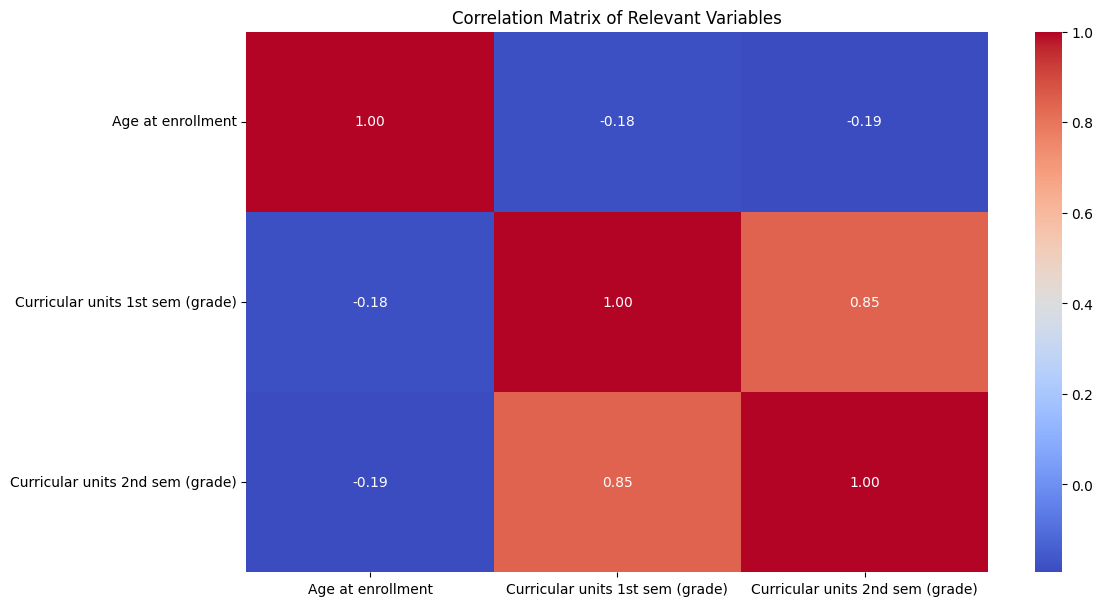

In [ ]:
corr_matrix = df_relevant[['Age at enrollment',
                           'Curricular units 1st sem (grade)',
                           'Curricular units 2nd sem (grade)',
                          ]].corr()

plt.figure(figsize=(10, 6))
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=360)

# Make y-axis labels horizontal
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=True)
plt.yticks(rotation=0)  # Set rotation to 0 for horizontal text
plt.title('Correlation Matrix of Relevant Variables')
plt.show()


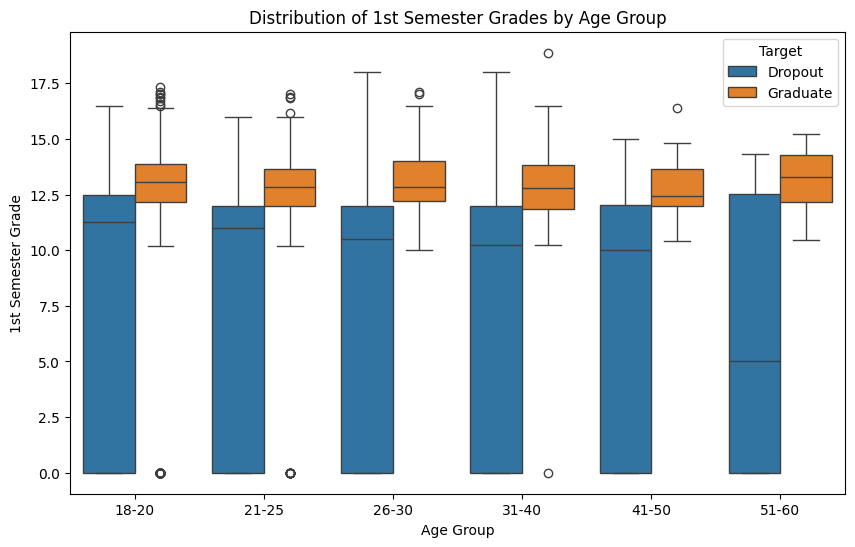

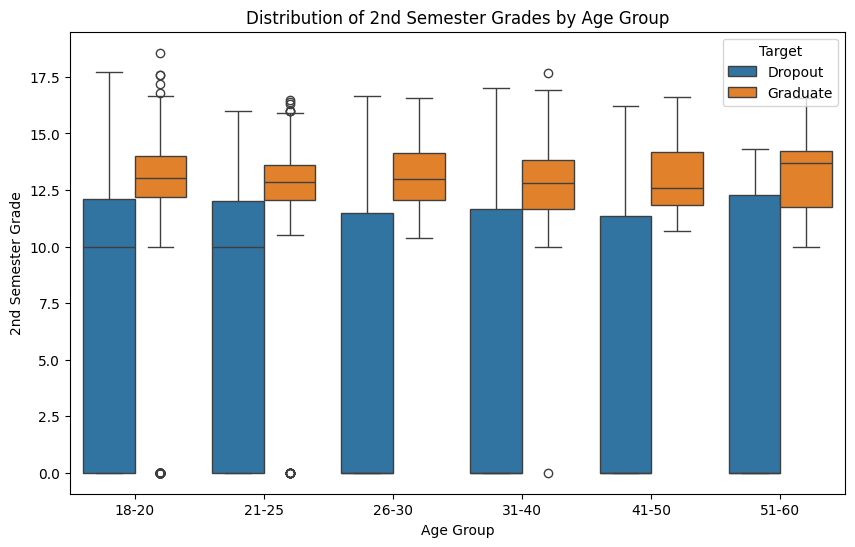

In [ ]:
#Analiza na vrskata pomegju starosta i ocenkite, potocno dali starosta vlijae na ocenkite vo razlicni semestri so box plot
df_relevant = df_relevant.drop(df_relevant[df_relevant['Target'] == 'Enrolled'].index)

#Box plot za ocenki od prviot semestar spored grupite na vozrast
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_relevant, x='Age Group', y='Curricular units 1st sem (grade)', hue='Target')
plt.title('Distribution of 1st Semester Grades by Age Group')
plt.xlabel('Age Group')
plt.ylabel('1st Semester Grade')
plt.show()

#Box plot za ocenki od vtoriot semestar spored grupite na vozrast
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_relevant, x='Age Group', y='Curricular units 2nd sem (grade)', hue='Target')
plt.title('Distribution of 2nd Semester Grades by Age Group')
plt.xlabel('Age Group')
plt.ylabel('2nd Semester Grade')
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Example DataFrame (replace with your actual DataFrame)
# Assuming 'Age Group' and 'Curricular units 1st sem (grade)' columns already exist
# df_relevant = pd.read_csv('your_data.csv')

# Separate data by age group
groups = [group['Curricular units 1st sem (grade)'].values
          for _, group in df_relevant.groupby('Age Group')]

# Perform One-Way ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

# Output results
print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between age groups.")
else:
    print("No statistically significant difference between age groups.")


ANOVA F-statistic: 34.00878996525615
P-value: 4.63131113406595e-34
There is a statistically significant difference between age groups.


<ipython-input-12-2cce35f5c70d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df_relevant.groupby('Age Group')]


In [ ]:
import pandas as pd
from scipy import stats

# Example DataFrame (replace with your actual DataFrame)
# Assuming 'Age Group' and 'Curricular units 1st sem (grade)' columns already exist
# df_relevant = pd.read_csv('your_data.csv')

# Separate data by age group
groups = [group['Curricular units 2nd sem (grade)'].values
          for _, group in df_relevant.groupby('Age Group')]

# Perform One-Way ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

# Output results
print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between age groups.")
else:
    print("No statistically significant difference between age groups.")

ANOVA F-statistic: 42.76919847621345
P-value: 5.936915180754169e-43
There is a statistically significant difference between age groups.


<ipython-input-13-64f3d49e16d1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df_relevant.groupby('Age Group')]


**There are significant differences in dropout rates between genders, with males having a higher likelihood of dropping out compared to females.**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Христина/data.csv', delimiter=';')

In [ ]:
#dropnuvanje na enrolled
df = df.drop(df[df['Target'] == 'Enrolled'].index)

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421


In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Tabela na kontigentnost koja pokazuva kako se raspredeleni vrednostite za Target po Gender
contingency_table = pd.crosstab(df['Gender'], df['Target'])
print(contingency_table)


Target  Dropout  Graduate
Gender                   
0           720      1661
1           701       548


In [ ]:
# Procentualna raspredebla za sekoja kategorija na Target po pol
contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(contingency_percentage)


Target    Dropout   Graduate
Gender                      
0       30.239395  69.760605
1       56.124900  43.875100


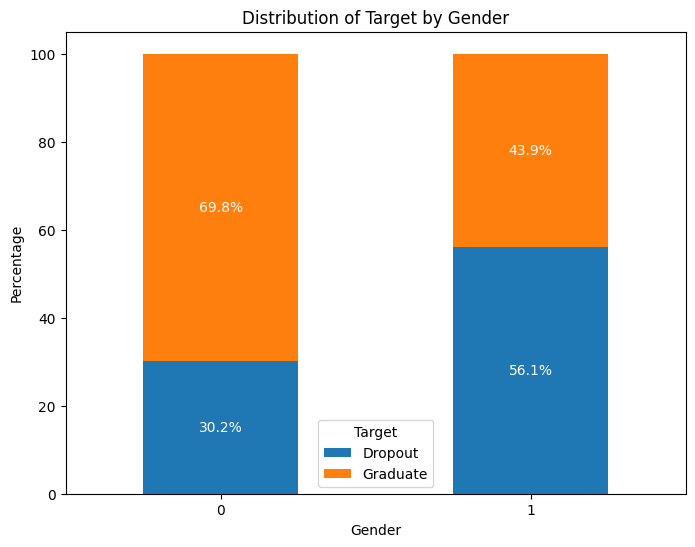

In [ ]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
ax = contingency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add percentage labels on the bars
for bars in ax.containers:  # Iterate through each bar segment
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white')  # Format to 1 decimal place and add '%'

# Chart titles and labels
plt.title('Distribution of Target by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Target')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Христина/target_by_gender.png')
plt.show()


In [ ]:
# Chi-square test za da utvrdime dali ima znacajna zavisnot pomegju Gender i Target, zemajki gi site kategorii na Target
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')


Chi-Square Value: 229.3515099719868
p-Value: 8.255973592335283e-52
Degrees of Freedom: 1


**Nationality influences dropout rates, with foreign students experiencing higher dropout rates due to cultural and language barriers.**


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Христина/data.csv', delimiter=';')

In [ ]:
df_selected = df[['Nacionality', 'Target']]


In [ ]:
#dropnuvanje na enrolled
df = df.drop(df[df['Target'] == 'Enrolled'].index)

In [ ]:
#Tabela na kontigenost za nacionalnost i target kolonata koja gi broi studentite vo sekoja kombinacija
# Mapping of nationality numbers to names
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

# Create the contingency table
contingency_table = pd.crosstab(df['Nacionality'], df['Target'])

# Sort the contingency table by the sum of dropouts and graduates (sum of each row)
contingency_table_sorted = contingency_table.loc[contingency_table.sum(axis=1).sort_values(ascending=False).index]

# Add a new column with nationality number and name
contingency_table_sorted['Nationality'] = contingency_table_sorted.index.map(lambda x: f"{x} - {nationality_map.get(x, 'Unknown')}")

# Print the sorted table with nationality names
print(contingency_table_sorted)

Target       Dropout  Graduate        Nationality
Nacionality                                      
1               1389      2155     1 - Portuguese
41                14        18     41 - Brazilian
22                 4         8  22 - Cape Verdean
26                 1         8     26 - Santomean
6                  4         4        6 - Spanish
24                 1         4       24 - Guinean
11                 0         3       11 - Italian
103                1         2    103 - Ukrainian
2                  0         2         2 - German
100                2         0      100 - Moldova
101                1         1      101 - Mexican
17                 1         0    17 - Lithuanian
21                 1         0       21 - Angolan
14                 0         1       14 - English
25                 0         1    25 - Mozambican
13                 0         1         13 - Dutch
62                 0         1      62 - Romanian
105                1         0      105 - Russian


In [ ]:
# Mapping of nationality numbers to names
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

# Assuming 'contingency_percentage_sorted' is already calculated and has the numeric index (nationality numbers)
# Create a new column that combines the nationality number and name
contingency_percentage_sorted['Nationality'] = contingency_percentage_sorted.index.map(lambda x: f"{x} - {nationality_map.get(x, 'Unknown')}")

# Print the updated table
print(contingency_percentage_sorted)


NameError: name 'contingency_percentage_sorted' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Bar chart za prikaz na studentite po nacionalnost i kategorija na Target kolonata

import matplotlib.pyplot as plt

# Example Data
# Let's assume contingency_percentage is a pandas DataFrame
# with 'Nationality' as the index (numeric values) and 'Target' as columns.

# Nationality map
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

# Replace the numeric index with the corresponding nationality names
contingency_percentage.index = contingency_percentage.index.map(nationality_map)

# Plot the stacked bar chart
contingency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('Distribution of Target by Nationality')
plt.ylabel('Percentage')
plt.xlabel('Nationality')

# Update x-ticks with rotated labels for readability
plt.xticks(rotation=45, ha='right')

# Show legend with the title 'Target'
plt.legend(title='Target')
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Христина/target_by_nationality.png')

# Show the plot
plt.show()


In [ ]:
# Chi-Square test za proverka dali postoi znacajna zavisnost pomegju nacionalnosta i statusot na otpisuvanje (Dropout)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')